In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Multivariate Linear Regression - Sklearn

In [5]:
np.random.seed(42)
X = 2 * np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.0173924806103027
R-squared: 0.8856631070983083


In [4]:
model.coef_

array([3.05294884, 4.962303  , 2.34302962])

## R squared

Its a way of measuring a how my model behaves vs a baseline model. How much is my model better than just predicting the average

$$
R^2 = 1 - \frac {SS_{ \text {res}}} {SS_ {\text {tot}}}
$$

SSres - sum of squares of residuals. Measures the squared differences between observed values and <b>predicted</b> values.

$$
SSres = \sum (y_i - \hat{y}_i)^2
$$

$$
SStot = \sum (y_i - \bar{y}_i)^2
$$

SStot - total sum of squares. Measures the squared difference between observed values and the <b>mean</b> observed value.

### R squared vs MSE

#### R squared pros and cons

Pros:
1. Easy to interpret as a percentage of variance explained.
2. Good for comparing models with the same dependent variable.

Cons:
1. It doesn’t provide information on the magnitude of the error.
2. It can be misleading if used alone, especially with non-linear models or if the model has many predictors.

#### MSE pros and cons

Pros:
1. Directly measures the error magnitude.
2. Useful for optimization, as it penalizes larger errors more heavily due to squaring.

Cons:
1. The scale of MSE depends on the scale of the dependent variable, which can make it harder to interpret in relative terms.
2. MSE is not normalized, so it doesn’t provide a direct measure of how well the model explains the variance.

# Multiple Linear Regression From Scratch

### Exercise

Lets write our own make regression function

Instructions:

The function should take the following parameters:
Number of samples, number of features (X), number of targets (y), amount of noise, intercept and an optional random state

1. Generate random numbers of some configureable size (e.g. 2 by 2, 3 by 4, etc) (this is X)
2. Generate a random matrix of coefficients by the size num_features by num_targets
3. Calculate the dot product between X and the coefficients to generate some y
4. Add the intercept to y
5. Add some random noise to y
6. If random_state exists, make sure to integrate it. Check numpy documentation/Google to find our how to insert a random state (a.k.a random seed) to numpy.
7. Plot the result of your function. Is the result actually linear?

#### Soilution

In [118]:
def make_regression_self_made(n_samples=100, n_features=1, n_targets=1, noise=0.0, intercept=0.0, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)

    X = np.random.randn(n_samples, n_features)

    coefficients = np.random.randn(n_features, n_targets)
    
    y = X.dot(coefficients)
    
    y += intercept
    
    y += noise * 0.01 * np.random.randn(n_samples, n_targets)
    
    y = np.squeeze(y)
    
    return X, y

In [214]:
np.random.randn(3)

array([-0.04570396,  0.22050766, -1.02993528])

In [215]:
np.random.randn(3)

array([-0.34994336,  1.10028434,  1.29802197])

In [119]:
X_res, y_res = make_regression_self_made(n_features=3)
assert y_res.ndim == 1

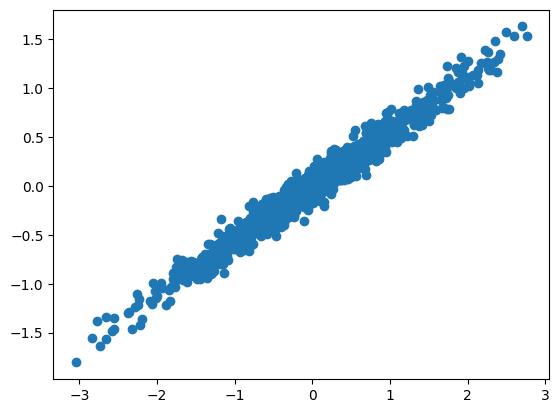

In [127]:
X, y = make_regression_self_made(n_samples=1000, n_features=1, noise=10, random_state=0)
plt.scatter(X,y)

## Back to Linear Regression for Scratch Builders

In [9]:
X, y = make_regression_self_made(n_samples=100, n_features=3, noise=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# add a column of ones to X to act as the intercept
train_rows, train_cols = X_train.shape
test_rows, test_cols = X_test.shape
X_train = np.c_[np.ones((train_rows, 1)), X_train]
X_test = np.c_[np.ones((test_rows, 1)), X_test]

NameError: name 'make_regression_self_made' is not defined

In [10]:
lr = 0.01
num_iterations = 100

In [11]:
n_features = X_train.shape[1]
params = np.random.randn(n_features)

In [12]:
def compute_loss(X, y, params):
    
    num_lablels = len(y)
    preds = X @ params # note the intercept is already included in params
    errors = preds - y
    loss = (1 / (2 * num_lablels)) * np.sum(np.square(errors))
    return loss

In [13]:
def gradient_descent(X, y, params1, lr, num_iterations):
    
    num_lablels = len(y)
    loss_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = X @ params
        errors = predictions - y
        gradients = (1 / num_lablels) * (X.T @ errors)
        params1 -= lr * gradients
        loss_history[i] = compute_loss(X, y, params)
        
    return params1, loss_history

In [14]:
%time params_, loss_history_ = gradient_descent(X_train, y_train, params, lr, num_iterations)

CPU times: user 2.19 ms, sys: 93 µs, total: 2.28 ms
Wall time: 2.55 ms


In [15]:
params

array([4.27189699, 4.54250059, 4.7159063 ])

In [16]:
params_

array([4.27189699, 4.54250059, 4.7159063 ])

In [17]:
x_plot = [num for num in range(len(loss_history_))]

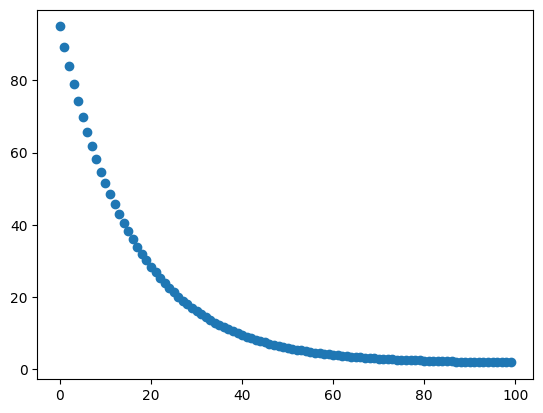

In [18]:
plt.scatter(x_plot, loss_history_)

# Linear Regression Limitations

1. Assumes linearity.
2. Sensitive to outliers
3. Assums homoscedasticity - the variance of the errors is the same across all the levels of the independent variables
4. Lack of Multicolinearity - independent variables are not very correlated with each other
5. Independence of errors
6. Limited capacity.

# Building a Real Model Prediction

### Exercise

take the airbnb dataset and predict the price. Test your code accordingly.

In [102]:
df = pd.read_csv('../../../datasets/AB_NYC_2019.csv')

In [90]:
len(df.columns)

16

In [91]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Naive Solution

In [58]:
df = pd.read_csv('../../../datasets/AB_NYC_2019.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
df_numeric = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type',
                     'last_review'
                     ], axis=1)

In [52]:
nan_indices_df1 = df_numeric[df_numeric.isna().any(axis=1)].index

In [53]:
df_numeric.drop(nan_indices_df1, inplace=True)

In [54]:
target = df_numeric['price']
df_numeric.drop(['price'], axis=1, inplace=True)

In [55]:
len(df_numeric), len(target)

(38843, 38843)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric, target, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27373.30743809134
R-squared: 0.048695784366156514


## Less Naive

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../datasets/AB_NYC_2019.csv')

In [74]:
df_numeric = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood'], axis=1)

In [75]:
nan_indices_df1 = df_numeric[df_numeric.isna().any(axis=1)].index
df_dummies = df_numeric.drop(nan_indices_df1)

In [76]:
df_dummies = pd.get_dummies(df_dummies, columns=['neighbourhood_group', 'room_type'])

In [77]:
target = df_dummies['price']
df_dummies.drop(['price'], axis=1, inplace=True)

In [46]:
assert len(df_normalized) == len(target)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.2, random_state=42)

In [79]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 23954.273037870138
R-squared: 0.1675174446892157


In [80]:
0.167 / 0.05

3.34

## Not Naive

In [7]:
df.drop(['id', 'host_id'], axis=1, inplace=True)

In [8]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
